# 🔥 Project-2: Loan Default Prediction (Finance Domain)

In [89]:
# improt libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
df=pd.read_csv("../data/vehicle_loan_default.csv")
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [90]:
# Basic info
df.shape

(233154, 41)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [92]:
#Target distribution
df['loan_default'].value_counts(normalize=True)

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

In [93]:
# Quick summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [94]:
# Checking missing values
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [99]:
# Identify data types (categorical vs numeric)

numerical_cols=df.select_dtypes(['float64','int64']).columns.to_list()
categorical_cols=df.select_dtypes(['object']).columns.to_list()
print(numerical_cols)

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'loan_default']


In [100]:
print(categorical_cols)

['Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']


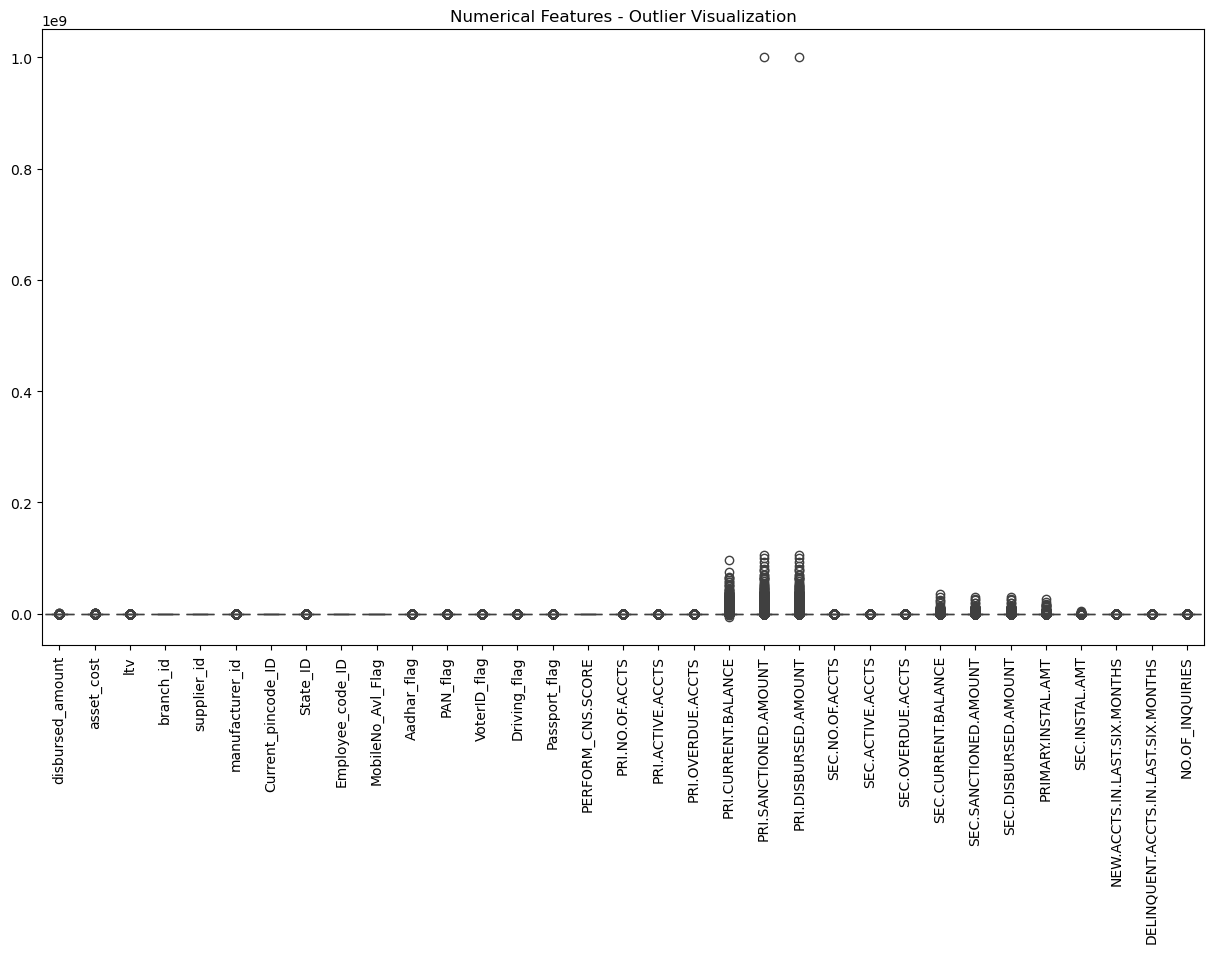

In [101]:
# Check outliers for numerical columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols].drop(columns=['UniqueID', 'loan_default']))
plt.xticks(rotation=90)
plt.title("Numerical Features - Outlier Visualization")
plt.show()

# This plot helps us to see features with extreme values such as:

1. PRI.CURRENT.BALANCE
2. PRI.SANCTIONED.AMOUNT
3. SEC.CURRENT.BALANCE
4. SEC.SANCTIONED.AMOUNT
5. etc.

In [56]:
# Feature Engineering
# Convert date features (DOB → Age, DisbursalDate → Loan age)
# Convert strings → datetime

df['Date.of.Birth']=pd.to_datetime(df['Date.of.Birth'],format='%d-%m-%y',errors='coerce')
df['DisbursalDate']=pd.to_datetime(df['DisbursalDate'],format='%d-%m-%y',errors='coerce')

from datetime import datetime
df['Age']=(df['DisbursalDate']-df['Date.of.Birth']).dt.days//365

# Interpretation:

. If Age < 18 → weird
. Age > 80 → unusual for vehicle loan
. We will cap extreme values later.

In [59]:
reference_date=df['DisbursalDate'].max()
df['Loan_Age_Days']=(reference_date-df['DisbursalDate']).dt.days

In [60]:
# Convert AVERAGE.ACCT.AGE like “3yrs 2mon” → months
# Convert CREDIT.HISTORY.LENGTH like “5yrs 6mon” → months

import re

def convert_age_to_months(x):
    if pd.isnull(x):
        return np.nan
    years=int(re.search(r'(\d+)yrs',x).group(1))
    months=int(re.search(r'(\d+)mon',x).group(1))
    return years*12+months
df['AVERAGE.ACCT.AGE_MONTHS']=df['AVERAGE.ACCT.AGE'].apply(convert_age_to_months)
df['CREDIT.HISTORY.LENGTH_MONTHS']=df['CREDIT.HISTORY.LENGTH'].apply(convert_age_to_months)

# This tells us:

. Older loans → more repayment history
. New loans → less information
. Later we may bin Loan_Age.

In [102]:
# Drop original textual columns and unnecessary columns

df.drop(['UniqueID','branch_id','supplier_id','manufacturer_id','Employee_code_ID','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','MobileNo_Avl_Flag'],axis=1,inplace=True)

In [107]:
numerical_cols=df.select_dtypes(['float64','int64']).columns.to_list()
categorical_cols=df.select_dtypes(['object']).columns.to_list()
print(numerical_cols)

['disbursed_amount', 'asset_cost', 'ltv', 'Current_pincode_ID', 'State_ID', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'loan_default']


In [108]:
print(categorical_cols)

['Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'PERFORM_CNS.SCORE.DESCRIPTION']


In [109]:
numerical_cols.remove('loan_default')

# Interpretation for EDA

1. High AVERAGE.ACCT.AGE → customer has long credit history → lower risk
2. High CREDIT.HISTORY.LENGTH → more mature credit → lower risk
3. High NO.OF_INQUIRIES or recent new accounts → higher risk
We will visualize these relationships next.

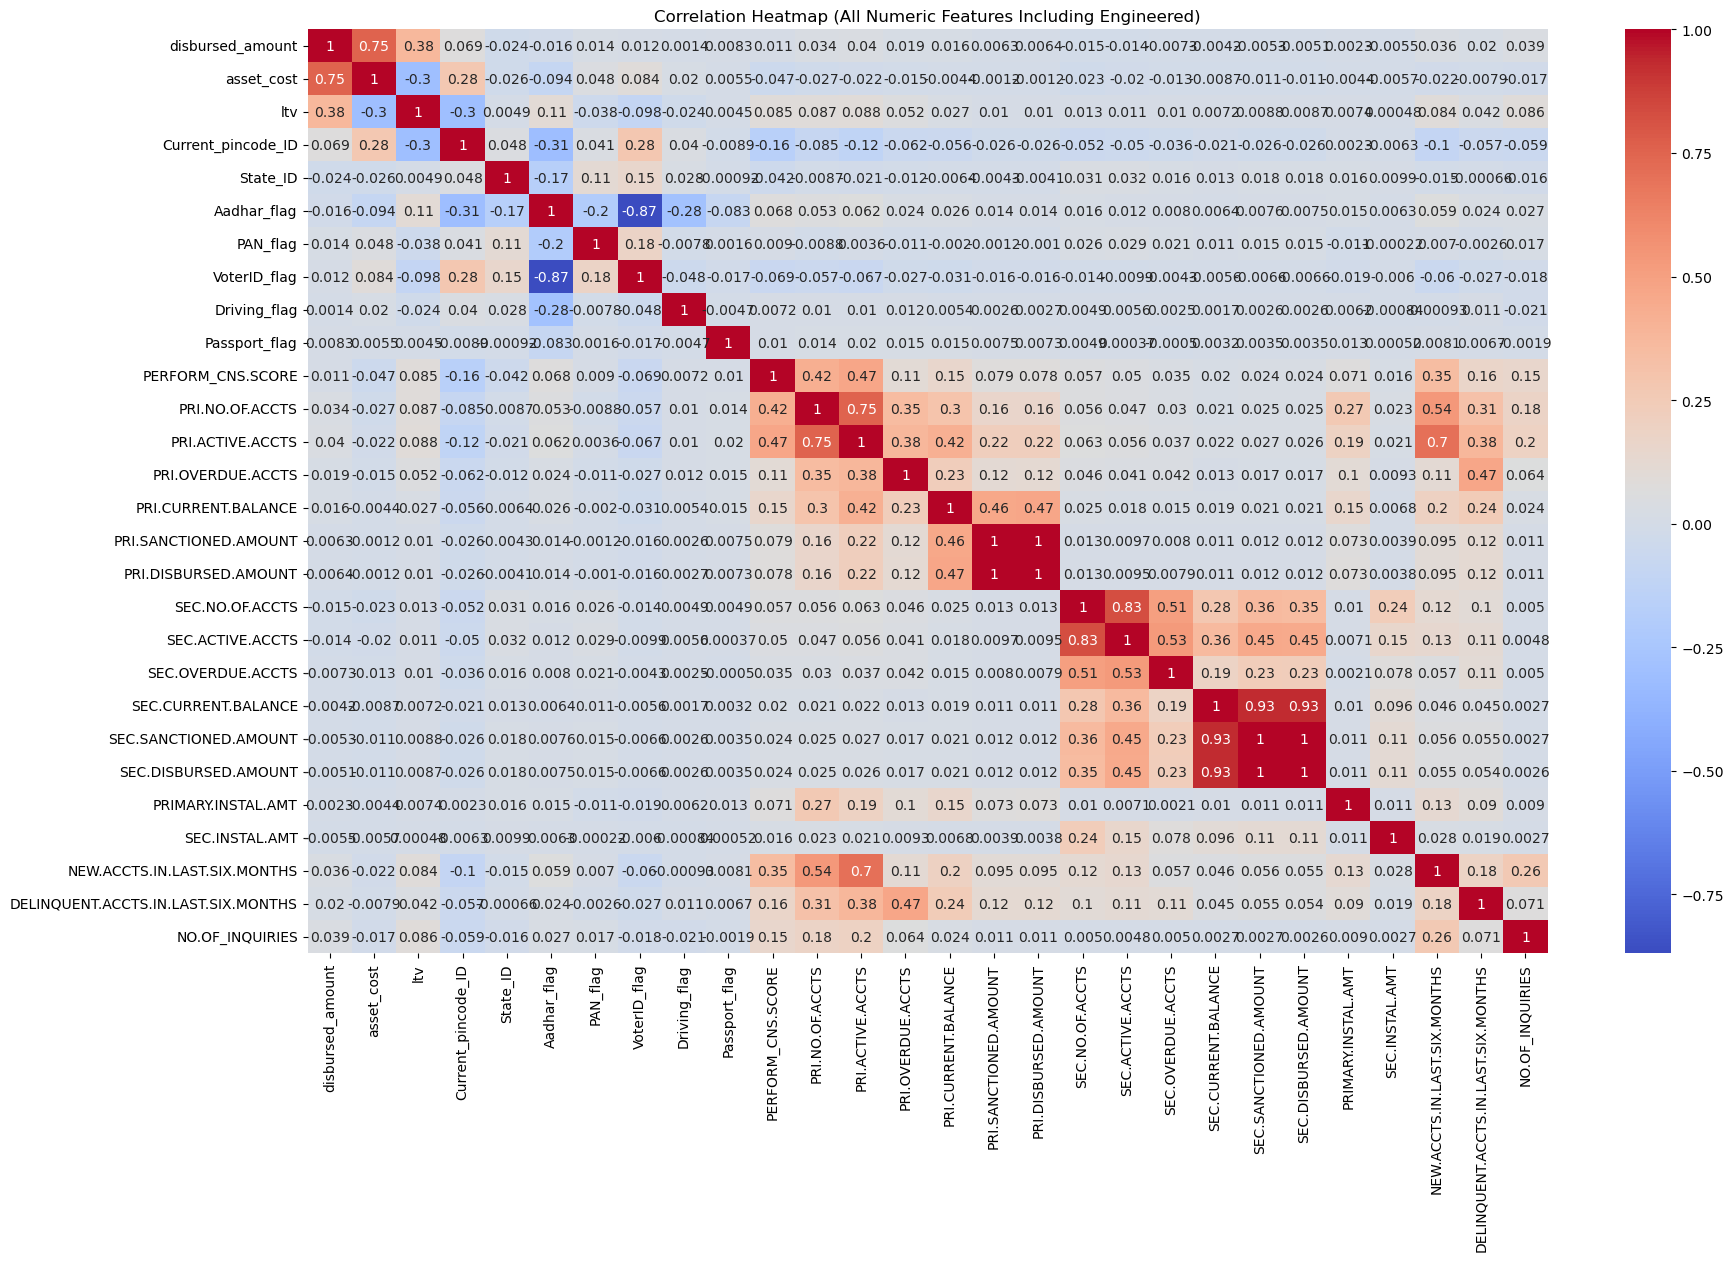

In [110]:
#  Numeric correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(df[numerical_cols].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (All Numeric Features Including Engineered)")
plt.show()

In [111]:
# Correlation with target only
df[numerical_cols].corrwith(df['loan_default']).sort_values(ascending=False)

ltv                                    0.098208
disbursed_amount                       0.077675
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
PRI.OVERDUE.ACCTS                      0.040872
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
Current_pincode_ID                     0.028419
asset_cost                             0.014261
PAN_flag                               0.002046
SEC.OVERDUE.ACCTS                     -0.001371
SEC.INSTAL.AMT                        -0.001548
SEC.CURRENT.BALANCE                   -0.005531
Driving_flag                          -0.005821
SEC.ACTIVE.ACCTS                      -0.005993
SEC.DISBURSED.AMOUNT                  -0.006248
SEC.SANCTIONED.AMOUNT                 -0.006354
Passport_flag                         -0.007602
SEC.NO.OF.ACCTS                       -0.008385
PRIMARY.INSTAL.AMT                    -0.010616
PRI.DISBURSED.AMOUNT                  -0

In [112]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_default', axis=1)
y = df['loan_default']

# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# We use stratify because of class imbalance.

In [115]:
# Create Preprocessing Transformers

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numeric Transformer
# Median imputation (safe for credit data)
# Scaling (optional but helps Logistic Regression)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())   # XGBoost not required but good for LR baseline
])

# Categorical Transformer
# Mode imputation + OneHotEncoding


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [116]:
# Logistic Regression Baseline Pipeline

from sklearn.linear_model import LogisticRegression

lr_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=500))
])

lr_clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['disbursed_amount',
                                                   'asset_cost', 'ltv',
                                                   'Current_pincode_ID',
                                                   'State_ID', 'Aadhar_flag',
                                                   'PAN_flag', 'VoterID_flag',
                                                   'Driving_flag',
                                                   'Passport_flag',
                                                   'PERFORM_CNS.SCORE',
                                                   'PRI.NO.OF.ACCTS',
                                                   'PRI.ACT...
                                                   'SEC.INSTAL.AMT',
                                                   'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
                                                   'NO.OF_INQUIRIES']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Date.of.Birth',
                                                   'Employment.Type',
                                                   'DisbursalDate',
                                                   'PERFORM_CNS.SCORE.DESCRIPTION'])])),
                ('model', LogisticRegression(max_iter=500))])

In [73]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_lr = lr_clf.predict(X_test)
y_proba_lr = lr_clf.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))


AUC: 0.6306009601051727
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     36509
           1       0.37      0.00      0.01     10122

    accuracy                           0.78     46631
   macro avg       0.58      0.50      0.44     46631
weighted avg       0.69      0.78      0.69     46631



In [117]:
# XGBoost Model Pipeline

from xgboost import XGBClassifier

xgb_clf=Pipeline(steps=[('preprocessor',preprocessor),
                ('model', XGBClassifier(n_estimators=300,
                                      learning_rate=0.05,
                                      max_depth=6,
                                      subsample=0.8,
                                      colsample_bytree=0.8,
                                      eval_metric='logloss'
                                      ))
                       ])
xgb_clf.fit(X_train,y_train)

y_pred_xgb=xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]
print("XGBoost AUC:", roc_auc_score(y_test, y_proba_xgb))
print('Classification Report :',classification_report(y_test,y_pred_xgb))


XGBoost AUC: 0.658216035153672
Classification Report :               precision    recall  f1-score   support

           0       0.78      1.00      0.88     36509
           1       0.53      0.01      0.02     10122

    accuracy                           0.78     46631
   macro avg       0.66      0.50      0.45     46631
weighted avg       0.73      0.78      0.69     46631



In [118]:
# LightGBM Model Pipeline
from lightgbm import LGBMClassifier
lgbm_clf=Pipeline(steps=[('preprocessor',preprocessor),
                        ('model',LGBMClassifier(
                            n_estimators=500,
                            learning_rate=0.03,
                            max_depth=-1,
                            num_leaves=31
                        ))
                ])
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm=lgbm_clf.predict(X_test)
y_proba_lgbm=lgbm_clf.predict_proba(X_test)[:,1]
print("LightGBM AUC:", roc_auc_score(y_test, y_proba_lgbm))
print("Classification Report:", classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 40489, number of negative: 146034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.046819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6896
[LightGBM] [Info] Number of data points in the train set: 186523, number of used features: 1678
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217072 -> initscore=-1.282809
[LightGBM] [Info] Start training from score -1.282809


C:\Users\madhu\.ipython\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\madhu\.ipython\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM AUC: 0.6586083076883561
Classification Report:               precision    recall  f1-score   support

           0       0.78      1.00      0.88     36509
           1       0.50      0.01      0.02     10122

    accuracy                           0.78     46631
   macro avg       0.64      0.50      0.45     46631
weighted avg       0.72      0.78      0.69     46631



In [119]:
# Threshold tuning for XG Boost model

import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.01, 0.51, 0.01)
results = []

for th in thresholds:
    y_pred_th = (y_proba_xgb >= th).astype(int)
    precision = precision_score(y_test, y_pred_th, zero_division=0)
    recall    = recall_score(y_test, y_pred_th, zero_division=0)
    f1        = f1_score(y_test, y_pred_th, zero_division=0)
    results.append([th, precision, recall, f1])

threshold_df = pd.DataFrame(results, columns=['threshold','precision','recall','f1'])
threshold_df.head()

,threshold,precision,recall,f1
0,0.01,0.217066,1.000000,0.356704
1,0.02,0.217066,1.000000,0.356704
2,0.03,0.217108,1.000000,0.356760
3,0.04,0.217321,0.999802,0.357036
4,0.05,0.218006,0.999012,0.357909


In [121]:
print("Top thresholds by Recall:")
print(threshold_df.sort_values('recall', ascending=False).head(10))

print("\nTop thresholds by F1:")
print(threshold_df.sort_values('f1', ascending=False).head(10))

print("\nTop thresholds by Precision:")
print(threshold_df.sort_values('precision', ascending=False).head(10))


Top thresholds by Recall:
   threshold  precision    recall        f1
0       0.01   0.217066  1.000000  0.356704
1       0.02   0.217066  1.000000  0.356704
2       0.03   0.217108  1.000000  0.356760
3       0.04   0.217321  0.999802  0.357036
4       0.05   0.218006  0.999012  0.357909
5       0.06   0.219386  0.997728  0.359683
6       0.07   0.221136  0.994764  0.361836
7       0.08   0.223874  0.989627  0.365144
8       0.09   0.227035  0.981328  0.368756
9       0.10   0.230842  0.968978  0.372857

Top thresholds by F1:
    threshold  precision    recall        f1
20       0.21   0.293366  0.682869  0.410415
21       0.22   0.300600  0.643845  0.409848
22       0.23   0.309406  0.605118  0.409453
19       0.20   0.286220  0.718238  0.409324
18       0.19   0.280425  0.751235  0.408400
17       0.18   0.274920  0.785023  0.407226
16       0.17   0.268493  0.815451  0.403974
23       0.24   0.315645  0.558289  0.403283
15       0.16   0.262393  0.841928  0.400094
24       0.25   0

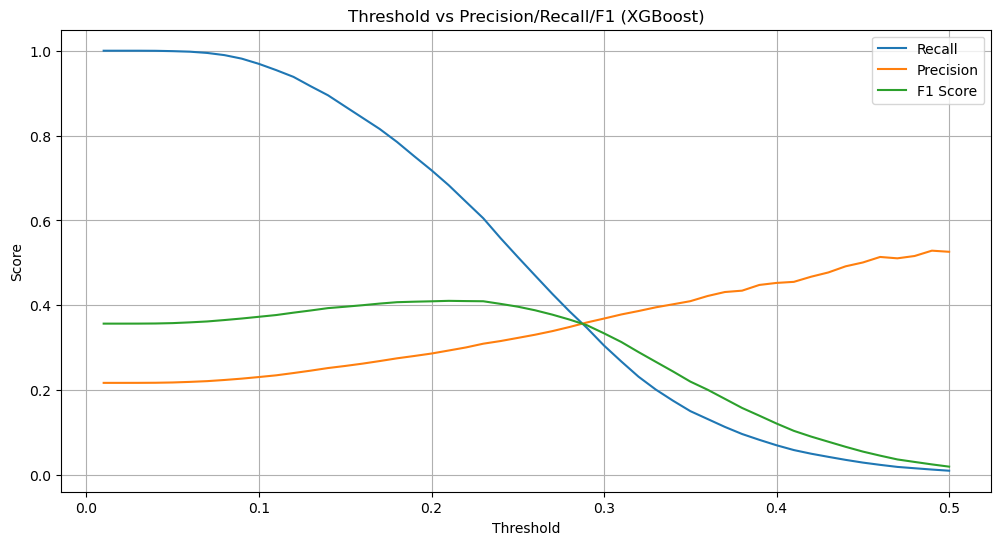

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(threshold_df['threshold'], threshold_df['recall'], label='Recall')
plt.plot(threshold_df['threshold'], threshold_df['precision'], label='Precision')
plt.plot(threshold_df['threshold'], threshold_df['f1'], label='F1 Score')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision/Recall/F1 (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
best_th = 0.21
y_pred_best = (y_proba_xgb >= best_th).astype(int)

precision = precision_score(y_test, y_pred_best)
recall    = recall_score(y_test, y_pred_best)
f1        = f1_score(y_test, y_pred_best)

print("Threshold =", best_th)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Threshold = 0.21
Precision: 0.2933661559356564
Recall: 0.6828689982216953
F1 Score: 0.4104147492800522


In [128]:
# Threshold tuning for LG Boost model

thresholds = np.arange(0.01, 0.51, 0.01)
results = []

for th in thresholds:
    y_pred_th = (y_proba_lgbm >= th).astype(int)
    precision = precision_score(y_test, y_pred_th, zero_division=0)
    recall    = recall_score(y_test, y_pred_th, zero_division=0)
    f1        = f1_score(y_test, y_pred_th, zero_division=0)
    results.append([th, precision, recall, f1])

threshold_df = pd.DataFrame(results, columns=['threshold','precision','recall','f1'])
threshold_df.head()

,threshold,precision,recall,f1
0,0.01,0.217066,1.000000,0.356704
1,0.02,0.217066,1.000000,0.356704
2,0.03,0.217085,1.000000,0.356729
3,0.04,0.217242,0.999802,0.356929
4,0.05,0.217835,0.999111,0.357685


In [129]:
print("Top thresholds by Recall:")
print(threshold_df.sort_values('recall', ascending=False).head(10))

print("\nTop thresholds by F1:")
print(threshold_df.sort_values('f1', ascending=False).head(10))

print("\nTop thresholds by Precision:")
print(threshold_df.sort_values('precision', ascending=False).head(10))


Top thresholds by Recall:
   threshold  precision    recall        f1
0       0.01   0.217066  1.000000  0.356704
1       0.02   0.217066  1.000000  0.356704
2       0.03   0.217085  1.000000  0.356729
3       0.04   0.217242  0.999802  0.356929
4       0.05   0.217835  0.999111  0.357685
5       0.06   0.219162  0.997728  0.359382
6       0.07   0.221195  0.995357  0.361954
7       0.08   0.223732  0.989133  0.364922
8       0.09   0.227184  0.980537  0.368897
9       0.10   0.231110  0.968781  0.373192

Top thresholds by F1:
    threshold  precision    recall        f1
20       0.21   0.295335  0.679806  0.411777
19       0.20   0.288765  0.714780  0.411348
21       0.22   0.301980  0.641968  0.410746
18       0.19   0.281851  0.746592  0.409216
22       0.23   0.308867  0.603240  0.408551
17       0.18   0.275339  0.777218  0.406626
16       0.17   0.269777  0.808239  0.404529
23       0.24   0.315239  0.559376  0.403233
15       0.16   0.264287  0.836989  0.401726
24       0.25   0

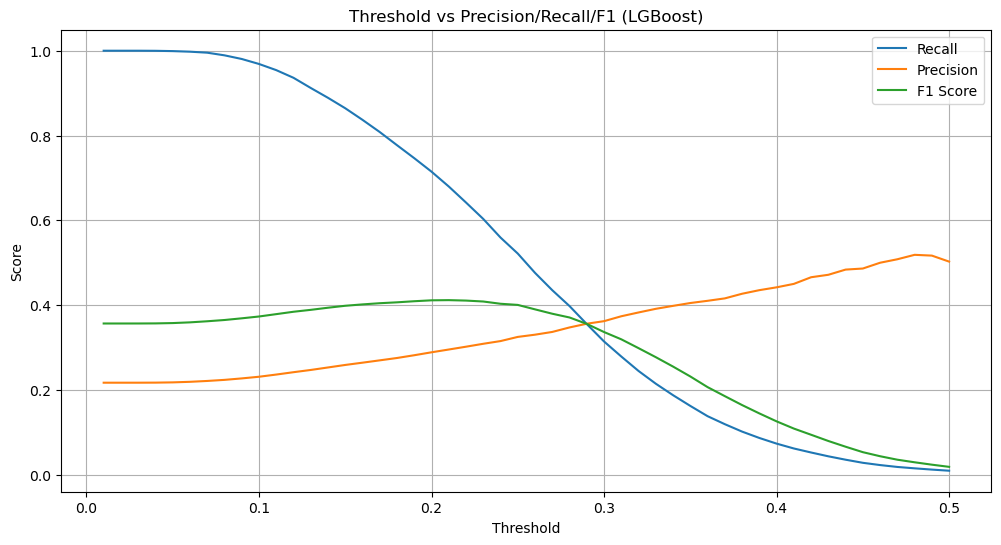

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(threshold_df['threshold'], threshold_df['recall'], label='Recall')
plt.plot(threshold_df['threshold'], threshold_df['precision'], label='Precision')
plt.plot(threshold_df['threshold'], threshold_df['f1'], label='F1 Score')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision/Recall/F1 (LGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
best_th = 0.21
y_pred_best = (y_proba_lgbm >= best_th).astype(int)

precision = precision_score(y_test, y_pred_best)
recall    = recall_score(y_test, y_pred_best)
f1        = f1_score(y_test, y_pred_best)

print("Threshold =", best_th)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Threshold = 0.21
Precision: 0.2953345637151809
Recall: 0.6798063623789765
F1 Score: 0.41177702642051406


# Interpretation of your results
. Logistic Regression
    AUC = 0.65 → acceptable for linear model
    Recall for Default = 0.00 → cannot catch defaulters at threshold 0.5
. XGBoost
    AUC = 0.68
    Recall for Default = 0.02 → still low at default threshold (0.5)
. LightGBM
    AUC = 0.67
    Similar behavior.

# Business Insight
Banks care more about recall (catch all potential defaulters).
The default 0.5 threshold punishes recall → so your earlier metrics looked bad.
Threshold tuning is mandatory for imbalanced loan datasets.

In [138]:
# Cost assumptions

cost_FN = 120000   # approving a defaulter = huge loss
cost_FP = 10000    # rejecting a good borrower = small loss
cost_TP = 0        # correctly flagging a defaulter
cost_TN = 0        # correctly approving a good borrower

# Use best threshold from your earlier analysis
best_th = 0.21

# Apply threshold
y_pred_cost = (y_proba_xgb >= best_th).astype(int)

print(y_pred_cost)

# Confusion matrix at threshold 0.20
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cost).ravel()
print(tn, fp, fn, tp)


# Compute total loss at threshold 0.20
total_loss = fn * cost_FN + fp * cost_FP
print("Total Loss at threshold 0.21 = ₹{:,.0f}".format(total_loss))


thresholds = np.arange(0.01, 0.51, 0.01) 
costs = [] 

for th in thresholds:
    y_pred = (y_proba_xgb >= th).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total_loss = fn * cost_FN + fp * cost_FP
    costs.append([th, total_loss])

cost_df = pd.DataFrame(costs, columns=['threshold', 'total_loss'])
cost_df.head()

[1 0 1 ... 1 0 1]
19860 16649 3210 6912
Total Loss at threshold 0.21 = ₹551,690,000


,threshold,total_loss
0,0.01,365090000
1,0.02,365090000
2,0.03,365000000
3,0.04,364710000
4,0.05,363920000


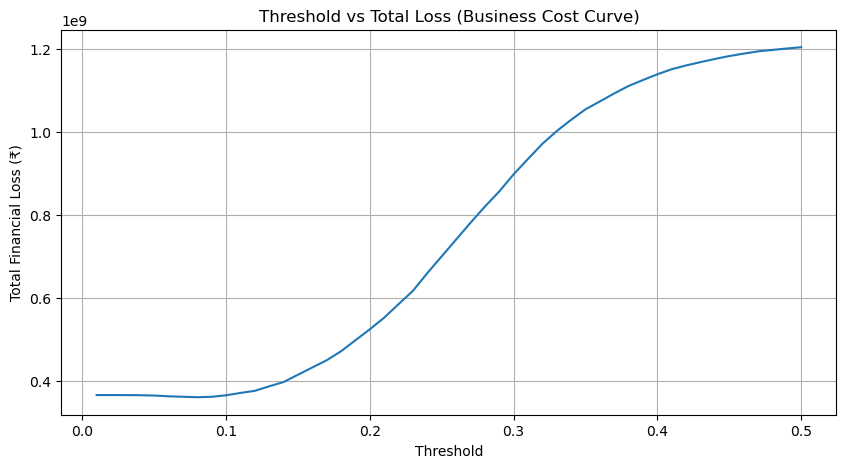

In [139]:
plt.figure(figsize=(10,5))
plt.plot(cost_df['threshold'], cost_df['total_loss'])
plt.xlabel("Threshold")
plt.ylabel("Total Financial Loss (₹)")
plt.title("Threshold vs Total Loss (Business Cost Curve)")
plt.grid(True)
plt.show()

In [141]:
best_idx = cost_df['total_loss'].idxmin() 
best_threshold = cost_df.loc[best_idx, 'threshold']
best_loss = cost_df.loc[best_idx, 'total_loss']
print("Best Business Threshold =", best_threshold)
print("Minimum Total Loss = ₹{:,.0f}".format(best_loss))

Best Business Threshold = 0.08
Minimum Total Loss = ₹359,870,000


# SHAP explainability,

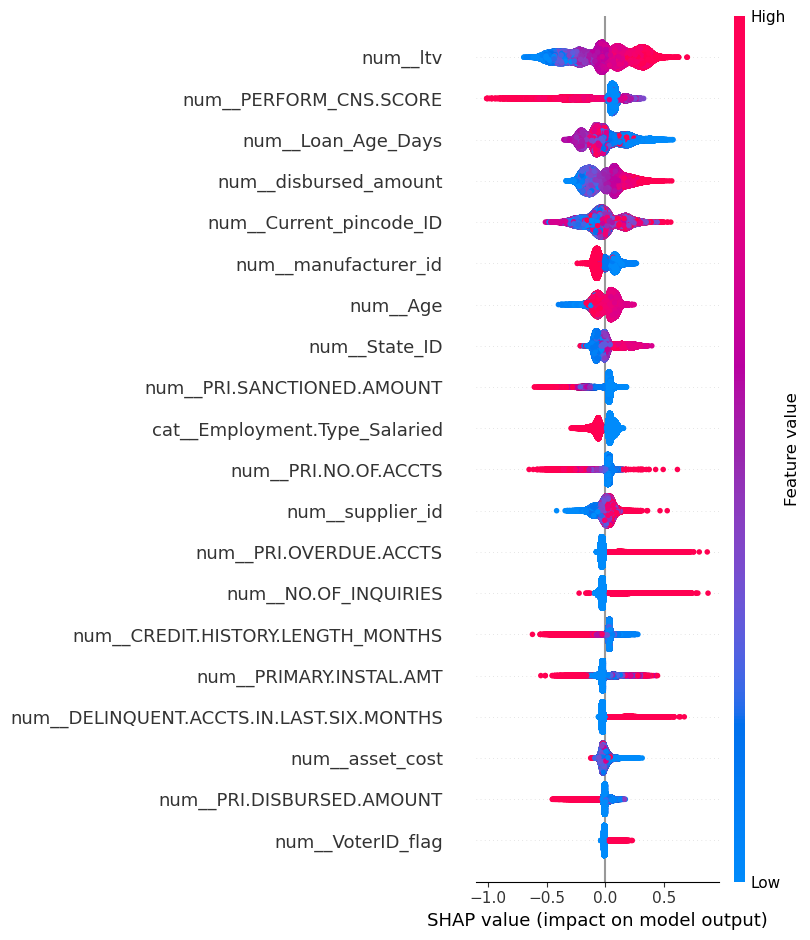

In [87]:
import shap
# Extract model
xgb_model=xgb_clf.named_steps['model']

# Transform data
X_train_transformed=xgb_clf.named_steps['preprocessor'].transform(X_train)
feature_names=xgb_clf.named_steps['preprocessor'].get_feature_names_out()

# SHAP explainer
explainer=shap.TreeExplainer(xgb_model)
shap_values=explainer.shap_values(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed,feature_names=feature_names)

# What You Will Learn from SHAP
# Top Risk Drivers (examples)

Low PERFORM_CNS score → big defaulter signal
Lots of enquiries → risky
Many active overdue accounts → risky
High LTV → risky
Short credit history → risky
Young age → sometimes risky

# Protection Factors
Fewer enquiries
Good CNS score
Lower LTV
No overdue accounts
Long credit history

# Save Final XGBoost Pipeline (with preprocessing inside)

In [142]:
import joblib

joblib.dump(xgb_clf, "loan_default_xgb_pipeline.pkl")
print("Model saved as loan_default_xgb_pipeline.pkl")

Model saved as loan_default_xgb_pipeline.pkl


# Save the business-optimal threshold (0.08)

In [143]:
BEST_THRESHOLD = 0.08

with open("best_threshold.txt", "w") as f:
    f.write(str(BEST_THRESHOLD))

print("Best threshold saved as best_threshold.txt")


Best threshold saved as best_threshold.txt


# Save feature names for Streamlit UI

In [144]:
import json

with open("feature_names.json", "w") as f:
    json.dump(list(X_train.columns), f)

print("Feature names saved.")

Feature names saved.


In [145]:
sample = X_test.iloc[0:1]

prob = xgb_clf.predict_proba(sample)[:, 1][0]
pred = (prob >= BEST_THRESHOLD)

print("Sample Prediction Probability:", prob)
print("Sample Final Decision:", pred)


Sample Prediction Probability: 0.21528453
Sample Final Decision: True


In [147]:
import pandas as pd

def loan_default_predict(model, input_data, threshold=BEST_THRESHOLD):
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    else:
        input_df = input_data

    prob = model.predict_proba(input_df)[:, 1][0]
    pred = int(prob >= threshold)

    return {
        "Probability": round(prob, 4),
        "Prediction": pred,
        "Risk": "High Risk (Likely Default)" if pred == 1 else "Low Risk (Safe Borrower)"
    }

In [149]:
model = joblib.load("../models/loan_default_xgb_pipeline.pkl")